In [6]:
import sys, os

sys.path.append(os.pardir)

In [7]:
import os

os.getcwd()

'/Users/psw/문서/programming/python/code/Python_study/딥러닝/deep-learning-from-scratch'

In [8]:
os.chdir('/Users/psw/문서/programming/python/code/Python_study/딥러닝/deep-learning-from-scratch')

In [9]:
# 교제 참고자료 불러오기
# !git clone https://github.com/oreilly-japan/deep-learning-from-scratch.git

# 1. 퍼셉트론

## 1. 퍼셉트론의 개념

퍼셉트론 : 다수의 신호를 입력으로 받아 하나의 신호를 출력

* 퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여
* 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용
* 신호는 0과 1의 값을 갖는다
---
ex) 입력 신호가 2개 일때   
$\ y=
\begin{cases}
0, \;(w1*x1 + w2*x2\leq theta)\\
1, \;(w1*x1 + w2*x2>theta)
\end{cases}$

## 2. 단순한 논리회로

### AND 게이트

두 입력이 모두 1일 때만 1을 출력

|x1|x2|y|
|--|--|--|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|  

### NAND 게이트

두 입력이 모두 1일 때만 0을 출력

|x1|x2|y|
|--|--|--|
|0|0|1|
|1|0|1|
|0|1|1|
|1|1|0|

### OR 게이트

두 입력 신호중 하나 이상이 1일때

|x1|x2|y|
|--|--|--|
|0|0|0|
|1|0|1|
|0|1|1|
|1|1|1|

## 3. 퍼셉트론 구현하기


In [10]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = w1*x1 + w2*x2
  if tmp <= theta:
    return 0
  elif tmp > theta:
    return 1

In [11]:
print(AND(0, 0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


# 신경망

## 1. 활성화 함수

* 입력신호를 출력신호로 바꿔줄 때 사용하는 함수
* $h(x)$를 이용하여 표현

### 시그모이드 함수

* $ h(x) = \frac{1}{1 + exp(-x)} $
* 퍼셉트론에서는 계단 함수를 활성화 함수로 사용하지만 신경망에서는 다른 함수를 이용

### 계단 함수 구현

* 입력이 0을 넘으면 1을 출력
* 그 외에는 0을 출력하는 함수

In [12]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [13]:
# 여러 인수를 받을 수 있는 계단 함수

def step_function1(x):
  y = x > 0
  return y.astype(int)

In [14]:
import numpy as np

input_var = np.array([1, 2, 3])
step_function1(input_var)

array([1, 1, 1])

### 계단 함수의 그래프

* 0을 경계로 출력이 0에서 1(또는 1에서 0으로 변경)
* 값이 바뀌는 형태가 계단처럼 생겼기 때문에 계단함수라 부른다

In [15]:
import matplotlib.pyplot as plt

def step_function(x):
  return np.array(x > 0, dtype = int)

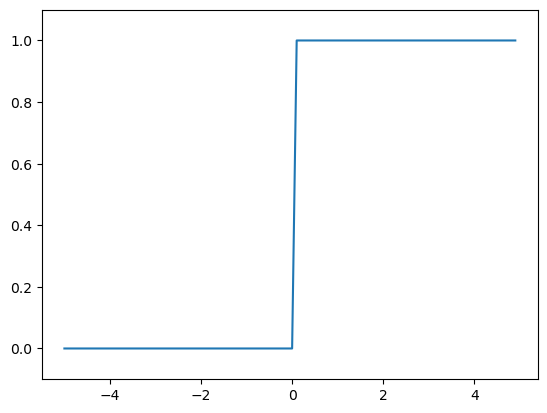

In [16]:
x = np.arange(-5, 5, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수 구현하기

In [17]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [18]:
x = np.array([-1, 1, 2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

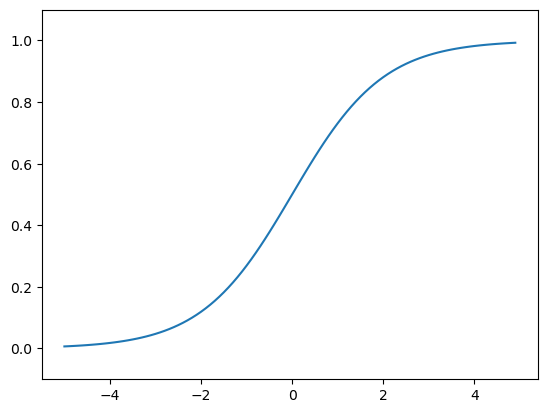

In [19]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수와 계단함수의 비교

* 시그모이드 함수의 매끈함이 신경망 학습에서 중요한 역할을 함
* 퍼셉트론에서는 0과 1이 출력, 신경망에선느 연속적인 실수가 출력

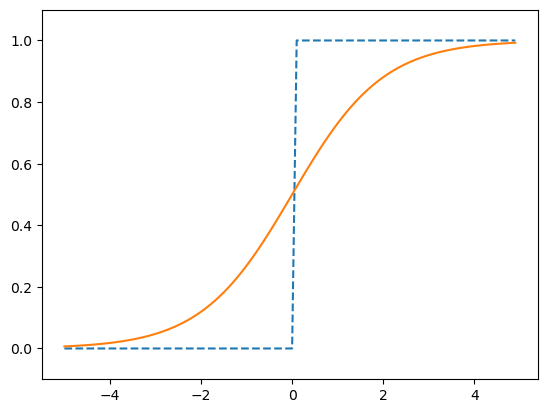

In [20]:
x = np.arange(-5, 5, 0.1)
y1 = step_function1(x)
y2 = sigmoid(x)

plt.plot(x, y1, '--')
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()

In [21]:
y2

array([0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
       0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ,
       0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
       0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725,
       0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.91682

활성화 함수는 비선형 함수를 사용 해야 함  
선형함수를 사용하면 신경망의 층을 깊게 하는 의미가 없어진다

### ReLU 함수

$\ h(x) =
\begin{cases}
0,\;(x<0)\\
x,\;(x\geq0)
\end{cases}$

In [22]:
def ReLU(x):
  return np.maximum(0, x)

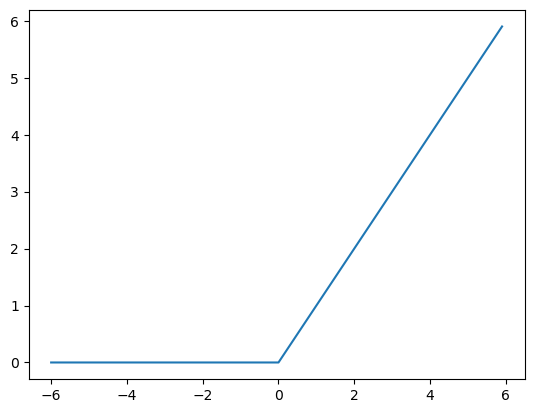

In [23]:
x = np.arange(-6, 6, 0.1)
y = ReLU(x)

plt.plot(x,y)
plt.show()

## 2. 다차원 배열의 계산

* 넘파이 배열은 신경망을 효율적으로 구현하기 위해 사용

### 1. 다차원 배열

In [24]:
# 1차원 배열

import numpy as np

A = np.array([1, 2, 3, 4])
print(A)

print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [25]:
# 2차원 배열

B = np.array([[1,2],
              [3,4],
              [4,5]])

print(np.ndim(B))
print(B.shape)

2
(3, 2)


In [26]:
# 3차원 배열

C = np.array([[[1,2],
              [3,4],
              [5,6]],
              [[6,5],
               [4,3],
               [2,1]]])
print(np.ndim(C))
print(C.shape)

3
(2, 3, 2)


### 2. 행렬의 곱

In [27]:
# [2*2] * [2*2]

A = np.array([[1,2], [3,4]])
print(A.shape)

B = np.array([[5,6], [7,8]])
print(B.shape)

print(np.dot(A, B)) #순서 주의

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [28]:
# [3*2] * [2]

A = np.array([[1,2], [3,4], [5,6]])
B = np.array([1,2])
np.dot(A,B)

array([ 5, 11, 17])

### 3. 신경망에서의 행렬 곱

* 입력이 2개
* 출력이 3개
* 편향과 활성화 함수를 생략

In [29]:
X = np.array([1, 2])
W = np.array([[3,4,5], [6,7,8]])
np.dot(X, W)

array([15, 18, 21])

##3. 3층 신경망 구현하기

* 입력층(0층) 2개
* 은닉층(1층) 3개
* 은닉층(2층) 2개
* 출력층(3층) 2개
* 편향 고려

### 1. 각층의 신호전달 구현

입력층 -> 은닉층(1층)

In [30]:
import numpy as np

X = np.array([1, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [31]:
print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [32]:
A1 = np.dot(X, W1) + B1
print(A1) #3개의 출력

[0.3 0.7 1.1]


In [33]:
# 활성화 함수

Z1 = sigmoid(A1)
print(Z1) #다음단계로 가는 최종출력

[0.57444252 0.66818777 0.75026011]


은닉층(1층) -> 은닉층(2층)

In [34]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [35]:
A2 = np.dot(Z1, W2) + B2
print(A2) # 2개 출력

[0.51615984 1.21402696]


In [36]:
# 활성화 함수 적용

Z2 = sigmoid(A2)
print(Z2)

[0.62624937 0.7710107 ]


은닉층(2층) -> 출력층(3층)

In [37]:
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
print(A3)

[0.31682708 0.69627909]


In [38]:
# 출력층의 활성화 함수는 은닉층의 활성화 함수와 다르다

def identify_function(x):
    return x

Y = identify_function(A3)
print(Y) #최종 결과값

[0.31682708 0.69627909]


### 2. 구현 정리

In [39]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x): #forward : 신호가 순방향(입력에서 출력방향)으로 전달됨
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)

    return y

In [40]:
network = init_network()

In [41]:
x = np.array([1, 0.5]) #입력값

In [42]:
y = forward(network, x)
print(y) #출력값

[0.31682708 0.69627909]


## 4. 출력층 설계

* 신경망은 분류와 회귀에 모두 이용가능
* 둘중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다

### 1. 항등함수와 소프트맥스 함수 구현

* 항등함수
    * 입력을 그대로 출력해주는 함수
* 소프트맥스함수
    * 분류를 위해 출력되는 값들의 합을 1로 만들어 확률화 시켜준다
    * $y_k = \displaystyle\frac{exp(a_k)}{\displaystyle\sum_{i=1}^n{exp(a_i)}}$

In [43]:
# 항등함수

def identify_function(x):
    return x

In [44]:
# 소프트맥스 함수 구현

a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [45]:
# 소프트맥스 함수

def softmax(x):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 2. 소프트맥스 함수 구현 시 주의점

* 지수함수의 특성상 입력값이 1000정도만 되도 오버 플로 발생
* 입력값의 가장큰값을 모든 원소들에 빼줘서 값을 조절해준다

In [46]:
a = np.array([1010, 1000, 990])
softmax(a)

/var/folders/12/xbyb7mtn19j7fdqb0rzs1gfr0000gn/T/ipykernel_70225/1173561592.py:4: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
/var/folders/12/xbyb7mtn19j7fdqb0rzs1gfr0000gn/T/ipykernel_70225/1173561592.py:6: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


array([nan, nan, nan])

In [47]:
c = np.max(a)
print(a-c)

[  0 -10 -20]


In [48]:
np.exp(a-c)/sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [49]:
def softmax(x):
    c = np.max(x)
    exp_a = np.exp(x - c)
    sum_exp_a = sum(np.exp(x-c))
    y = exp_a / sum_exp_a

    return y

In [50]:
# 작은 값이 함께 있을때는? => 0으로 만든다 즉 overflow문제가 발생하지 않는다

a = np.array([1000, 10, 1])
softmax(a)

array([1., 0., 0.])

### 3. 소프트맥스 함수의 특징

* 출력의 총합은 1이된다 => 확률로 해석이 가능함
* 소프트맥스를 적용해도 각 원소의 대소 관계는 변하지 않음
    * 단조 증가함수를 이용하기 때문
---

* 신경망을 이용한 분류는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식
* 결과적으로 소프트맥스 함수를 생략해도 된다

In [51]:
a = np.random.randint(0,10,10)
y = softmax(a)
print(y)

[9.38247921e-05 5.12266008e-03 1.39248338e-02 9.38247921e-05
 7.60270165e-01 9.38247921e-05 1.02891378e-01 1.02891378e-01
 6.93276652e-04 1.39248338e-02]


In [52]:
sum(y)

0.9999999999999997

### 4. 출력층의 뉴런수 정하기

* 분류하고 싶은 클래스의 수로 정하는게 일반적이다

## 손글씨 숫자 인식

### 1. MNIST 데이터셋

* 손글씨 숫자 이미지 집합

In [53]:
import numpy as np

MNIST image 출력

In [54]:
#shape 확인

import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True,   #1차원으로 변환
                                                  normalize = False,    # 픽셀값을 0~1사이로 변환
                                                  one_hot_label = False)    # 결과 라벨을 원핫 인코딩
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [55]:
#이미지 로드

import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img)) # PIL용 데이터 객체로 변환하는 법
  pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

img = x_train[0] # image pixel information
label = t_train[0] # image label
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


### 2. 신경망의 추론 처리

* 입력층 뉴련 784개 출력층 뉴런 10개로 정의
  * 28 * 28 이미지 => 입력층 784
  * 10개의 이미지 레이블 => 출력층 10

* 은닉층
  * 첫번째 층 50개
  * 두번째 층 100개

In [56]:
# data load function

def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True,
                                                    flatten = True,
                                                    one_hot_label = False)
  return x_test, t_test

In [57]:
# sample_weight.pkl 저장경로로 변경

os.chdir('/Users/psw/문서/programming/python/code/Python_study/딥러닝/deep-learning-from-scratch/ch03')

In [58]:
import pickle

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f) #sample_weight.pkl 파일에 가중치가 저장돼있다.

    return network

In [59]:
def predict(network, x):
    # 저장된 가중치 불러오는 작업
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [60]:
x, t = get_data() #test data만 불러온다
network = init_network()

In [61]:
acc_cnt = 0

for i, j in enumerate(x):
    y = predict(network, j) #저장된 모델을 이용하여 예측
    p = np.argmax(y) # 예측 모델의 결과값중 최대 확률 라벨을 구함
    if p == t[i]:
        acc_cnt += 1 # 예측 라벨과 실제 라벨이 같으면 정답 처리

print(f'accuracy : {str(float(acc_cnt)/len(x))}')

accuracy : 0.9352


### 3. 배치 처리

In [62]:
x, _ = get_data()
network = init_network()

In [63]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

X(784) * (784,50) * (50,100) * (100,10) => Y(10)
* 하나의 이미지 입력

In [64]:
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


이미지 여러장을 한꺼번에 입력하는 경우

X(100,784) * (784,50) * (50*100) * (100*10) => Y(100*10)

* 이러한 100장의 묶은 데이터를 배치라고 한다

In [65]:
# 배치 처리 구현

x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = []

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size, :]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt.append(np.sum(p == t[i:i+batch_size]))

print(f'accuracy : {np.array(accuracy_cnt)/100}') #각 배치별 정답율 확인

accuracy : [0.92 0.93 0.93 0.9  0.89 0.86 0.89 0.9  0.91 0.89 0.9  0.86 0.83 0.92
 0.89 0.89 0.88 0.82 0.85 0.85 0.87 0.86 0.96 0.85 0.87 0.86 0.92 0.93
 0.94 0.89 0.95 0.91 0.91 0.92 0.9  0.9  0.94 0.88 0.81 0.86 0.85 0.94
 0.91 0.89 0.9  0.92 0.89 0.93 0.89 0.89 0.92 0.95 0.97 0.99 0.99 0.98
 0.92 0.95 0.96 0.93 0.85 0.95 1.   0.97 0.92 0.88 0.91 0.89 0.99 0.98
 0.96 0.98 0.95 0.99 0.92 0.97 0.99 0.98 0.92 0.9  0.93 0.99 0.94 0.94
 0.97 0.96 0.99 1.   1.   1.   0.87 0.96 0.95 0.99 0.97 0.94 0.93 0.85
 0.87 0.91]


3장 요약

* 퍼셉트론과 달리 신경망에는 활성화함수가 있다
* 활성화 함수의 종류로는 ReLU, sigmoid, softmax 함수 등이 있다
* numpy 다차원 배열을 통해 신경망을 효율적으로 구성할 수 있다
* 입력데이터를 묶은 것을 배치라 하며 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다


# 신경망 학습

## 1. 데이터를 통한 학습

* 신경망에서 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 획득하는것을 의미한다


## 2. 손실함수

* 성능의 나쁨을 나타내는 지표
* 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하느냐를 의미

### 1. 평균 제곱오차(MSE)

$E = \displaystyle\frac{1}{2}\displaystyle\sum_{k}{(y_k-t_k)^2}$

* 일반적으로 $\displaystyle\frac{1}{k}$ 을 사용함

In [66]:
def mse(y, t):
    if len(y) == len(t):
        return (1/2) * np.sum((y-t)**2)
    else:
        return print('length not match')

In [67]:
# y: 신경망의 출력, t : 정답 레이블

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #정답 레이블이 2일때

# 2일 확률이 가장 높다고 추정함

y1 = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
print(f'case1: {mse(np.array(y1), np.array(t))}')

# 7일 확률이 가장 높다고 추정

y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6 , 0.0, 0.0]
print(f'case2: {mse(np.array(y2), np.array(t))}')


# -> 손실함수를 확인했을때 더 작은 첫번째 추정결과가 정답에 더 가까울거라 예상 가능

case1: 0.09750000000000003
case2: 0.5975


### 2. 교차 엔트로피 오차

$E = -\displaystyle\sum_{k}{t_klogy_k}$ (log는 밑이 e인 자연로그)

$y_k$ : 신경망의 출력  
$t_k$ : 정답 레이블(one-hot encoding 형태)

* 즉 정답일때의 로그 신경망 출력값을 의미한다

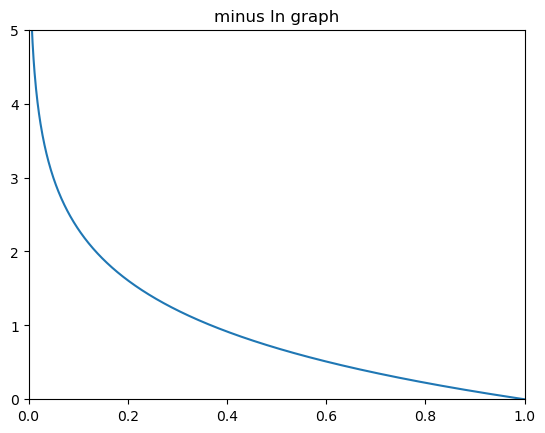

In [68]:
x = np.linspace(0,1, 1000)
y = np.log(x + 0.00001) # log0 방지를 위해 0.00001 더하기

plt.plot(x,-y)
plt.ylim(0,5)
plt.xlim(0,1)
plt.title('minus ln graph')
plt.show()

# -> y값이(정답 레이블의 확률)이 커질수록 Error값이 작아진다

In [69]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [70]:
# y: 신경망의 출력, t : 정답 레이블

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #정답 레이블이 2일때

# 2일 확률이 가장 높다고 추정함

y1 = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
print(f'case1: {cross_entropy_error(np.array(y1), np.array(t))}')

# 7일 확률이 가장 높다고 추정

y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6 , 0.0, 0.0]
print(f'case2: {cross_entropy_error(np.array(y2), np.array(t))}')


# -> 손실함수를 확인했을때 더 작은 첫번째 추정결과가 정답에 더 가까울거라 예상 가능
# -> 평균제곱오차(mse)와 판단이 일치함

case1: 0.510825457099338
case2: 2.302584092994546


### 3. 미니배치학습

* 훈련데이터를 통해 손실함수를 구한다
* 모든 훈련데이터에 대한 손실함수의 합을 구하는 방법

교차 엔트로피 함수

$E = -\frac{1}{n}\displaystyle\sum_{n}\sum_{k}{t_{n,k}logy_{n,k}}$

* 단순히 교차엔트로피의 평균이라 생각하면됨

In [71]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True,
                                                  flatten = True,
                                                  one_hot_label = False)

In [72]:
# batch size가 10일때

np.random.seed(10)
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) #60000중 무작위로 10개의 숫자 추출
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(batch_mask)

[17673 40061 29199 50496 28017 40059  9372 10201 37597 17904]


### 5. (배치용) 교차 엔트로피 오차 구현하기

In [73]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    result = -np.sum(t*np.log(y+1e-7)) / batch_size
    return result

코드 해석

* y.ndim == 1일때 왜 reshape을 사용하는가

In [74]:
y1 = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [75]:
y_array = np.array(y1)
y_r = y_array.reshape(1,y_array.size)

In [76]:
t_array = np.array(t)
t_r = t_array.reshape(1, t_array.size)

In [77]:
print(y_array)
print(y_array.shape)
print(y_r)
print(y_r.shape)

[0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]
(10,)
[[0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]]
(1, 10)


In [78]:
print(y_array.shape[0])
print(y_r.shape[0])

# -> 자료가 1개 즉 batch_size가 1인데 reshape을 안해준다면 batch_size가 10이된다.
# -> 즉 batch_size가 1일때 batch_size가 2 이상일때와 동일하게 맞춰준다

10
1


In [79]:
-np.sum(t_r * np.log(y_r + 1e-7))

# -> reshape을 해줘도 연산은 제대로 잘된다.

0.510825457099338

In [80]:
# 정답레이블이 원핫 인코딩 변환이 안되있는 경우

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    result = -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
    return result

코드 해석

* y[np.arange(batch_size),t]

In [81]:
# batch_size가 3일경우

y = np.array([[0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0],
              [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0],
              [0.1, 0.05, 0.1, 0, 0.05, 0.6, 0, 0.1, 0, 0]])

y[np.arange(3), np.array([2,7,5])] # 정답 레이블만의 신경망의 출력을 추출해준다

array([0.6, 0.6, 0.6])

### 5. 손실함수를 사용하는 이유

* 정확도라는 지표가 있는데 손실함수를 왜 사용하는가?
    * 최적의 매개변수를 탐색할 때 손실함수의 값을 가능한 작게 하는 매개변수 값을 찾는다
    * 이때 미분을 활용하게 됨
    * 손실함수를 가중치 매개변수 값으로 미분을 해준다면 매개변수값의 변화량과 그애 따른 손실함수의 변화를 수치화 가능



예시)

* 정확도가 지표일때
    * 100장의 훈련데이터 중 32장을 올바로 인식한다고 하면
    * 매개변수의 값을 조절해도 정확도가 불연속 하게 바뀐다 즉   
    => 32%의 정확도가 개선해서 34장을 맞춘다면 34%의 정확도가 된다

* 손실함수가 지표일때
    * 손실함수의 값이 0.8381xx 같은 연속 수치로 나타남
    * 매개변수의 값이 변하면 손실함수의 값도 연속적으로 변화함

## 3. 수치미분

* 해석적 미분 : 우리가 수업시간 때 배웠던 $x^2$ 미분 => $2x$
    * 따라서 해석적 미분은 오차를 포함하지 않는 진정한 미분 값을 구해준다
    
* 수치 미분 : 근사치로 기울기를 계산하는 방법

### 1. 미분

미분 구현

In [82]:
#나쁜구현
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

In [83]:
# h의 값이 너무 작아서 구현이 안됨

np.float32(1e-50) #np.float64일때는 구현 됨

0.0

In [84]:
# 10e-50은 너무 작아 컴퓨터가 인식 못함 -> 적당한 1e-4이용
# 전방차분의 한계 -> 중앙차분으로 변환(중앙차분으로 변환할때 좋은점은 자세히 설명되있지않음)

In [85]:
def numerical_diff(f, x):
    h = 1e-5
    return (f(x+h) - f(x-h)) / 2*h

### 2. 수치 미분의 예

$ f = 0.01x^2 + 0.1x$

In [86]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [87]:
numerical_diff(function_1, 5)

#해석적미분의 2와 거의 같은값으로 볼 수 있을 정도로 오차가 작다

1.999999999890978e-11

### 3. 편미분

$ f(x_0, x_1) = x_0^2 + x_1^2$

* $x_0 = 3, x_1 = 4$ 일때 $x1, x2$에 대한 각각의 편미분을 구하라
* $\frac{\partial f}{\partial x_0}$, $\frac{\partial f}{\partial x_1}$



In [88]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [89]:
def function_tmp1(x0):
    return x0*x0 + 4 ** 2

In [90]:
numerical_diff(function_tmp1, 3) #x0에 대한 편미분 계수

6.000000000128125e-10

In [91]:
def function_tmp2(x1):
    return 3**2 + x1*x1

In [92]:
numerical_diff(function_tmp2, 4)

7.999999999874774e-10

## 4. 기울기

* 기울기가 가리기는 쪽은 각 장소에서 함수의 출력값을 가장 크게 줄이는 방향

수식

$ x_0 = x_0 - \eta * \frac{\partial f}{\partial x_0} $  
$ x_1 = x_1 - \eta * \frac{\partial f}{\partial x_1} $  


$\eta$ 는 신경망에서 학습률을 의미

기울기 함수 구현

In [93]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) #빈 기울기 벡터 정의

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

$f(x_0, x_1) = x_0^2 + x_1^2 $ 함수의 gradient확인

In [94]:
numerical_gradient(function_2, np.array([3, 4])) #값을 입력할 때 정수형으로 넣으면 올바른 값이 나오지 않음

array([25000, 35000])

In [95]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

### 1. 경사법(경사 하강법)

* 기울기를 잘이용해 함수의 최솟값(또는 가능한 작은 값)을 찾으려는 것이 경사법
* 함수가 복잡해지면 기울기의 방향에 최솟값이 없을수도 있다

경사하강법 구현

In [96]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [97]:
init_x = np.array([-3.0, 4.0])
gradient_descent(f = function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

학습률에 따라 비교

In [98]:
# 학습률이 클 때 : lr = 10

init_x = np.array([-3.0, 4.0])
gradient_descent(f = function_2, init_x = init_x, lr = 10, step_num = 100)

# -> 너무 큰값으로 발산함

array([-2.58983747e+13, -1.29524862e+12])

In [99]:
# 학습률이 클 때 : lr = 1e-10

init_x = np.array([-3.0, 4.0])
gradient_descent(f = function_2, init_x = init_x, lr = 1e-10, step_num = 100)

# -> 거의 갱신되지 않고 끝남

array([-2.99999994,  3.99999992])

### 2. 신경망에서의 기울기

simpleNet확인

* 입력이 2개 출력이 3개 인 단순한 신경망

In [100]:
os.chdir('/Users/psw/문서/programming/python/code/Python_study/딥러닝/deep-learning-from-scratch')

In [101]:
# simpleNet클래스

from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) #가중치 초기값으로 랜덤한값 부여

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [102]:
net = simpleNet()
print(net.W)

[[-0.90561048 -0.89808938  0.45187984]
 [-0.85947418 -0.53479453  1.03287114]]


In [103]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p) # 최대값의 인덱스

t = np.array([0,0,1]) # 정답 레이블
net.loss(x,t)

[-1.31689305 -1.0201687   1.20071193]


0.17325214207093917

In [104]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

# f = lambda w: net.loss(x, t) // 간단하게 함수 구현 가능

[[ 0.04069366  0.05475106 -0.09544472]
 [ 0.06104049  0.08212658 -0.14316707]]


왜 f(W)로 net.loss(x, t)를 지정하는가?

In [105]:
import traceback

try:
    numerical_gradient(net.loss(x, t), net.W)

except:
    print(traceback.format_exc())

# -> object를 부를수 없다고 함

Traceback (most recent call last):
  File "/var/folders/12/xbyb7mtn19j7fdqb0rzs1gfr0000gn/T/ipykernel_70225/1400655491.py", line 4, in <module>
    numerical_gradient(net.loss(x, t), net.W)
  File "/Users/psw/문서/programming/python/code/Python_study/딥러닝/deep-learning-from-scratch/common/gradient.py", line 43, in numerical_gradient
    fxh1 = f(x) # f(x+h)
           ^^^^
TypeError: 'numpy.float64' object is not callable



In [106]:
#numerical_gradient 함수 구성 요소
import inspect

code = inspect.getsource(numerical_gradient)
print(code)


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad



In [107]:
# x, t변수를 같이 사용하기 위해?

x = 3
y = 123
g = lambda c : x**2 + y

def test_func(h, x):
    x += 3
    res = h(x)
    return res

test_func(g, 3)

132

## 5. 전체 학습 알고리즘 구현

전체
* 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 학습이라고 한다.
---
1. 미니배치
* 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표

2. 기울기 산출
* 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게하는 방향을 제시한다

3. 매개변수 갱신
* 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다

4. 반복
* 1단계 ~ 3단계를 반복


확률적 경사하강법

* 확률적으로 무작위로 골라낸 데이터에 대해 수행하는 경사하강법이라는 의미
* stochastic gradient discent

### 1. 2층 신경망 클래스 구현하기

손글씨 숫자를 학습하는 신경망을 구현

* 2층신경망(은닉층이 1개)

In [108]:
import os

os.getcwd()

'/Users/psw/문서/programming/python/code/Python_study/딥러닝/deep-learning-from-scratch'

In [109]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)

        a2 = np.dot(a1, W2) + b2
        y = softmax(a2)

        return y
    
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y==t) / float(x.shape[0])

        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads


In [110]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [111]:
# 더미데이터 예측

x = np.random.rand(100, 784) #더미 입력데이터, batch size가 100
y = net.predict(x)

In [112]:
# 더미데이터 예측 기울기 계산
import time

x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

start = time.time()
grads = net.numerical_gradient(x, t)
grads['W1']
print(f'계산 소요 시간 : {time.time() - start}')

계산 소요 시간 : 187.9234688282013


In [113]:
grads['W1'].shape

(784, 100)

### 2. 미니배치 학습 구현하기

In [114]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []

#hyper parameter

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

start = time.time()

for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) #기존에 사용하던 방식, 속도가 매우느림
    grad = network.gradient(x_batch, t_batch) #오차 역전파 방식

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

print(f'소요시간 : {time.time() - start}')

소요시간 : 39.22507190704346


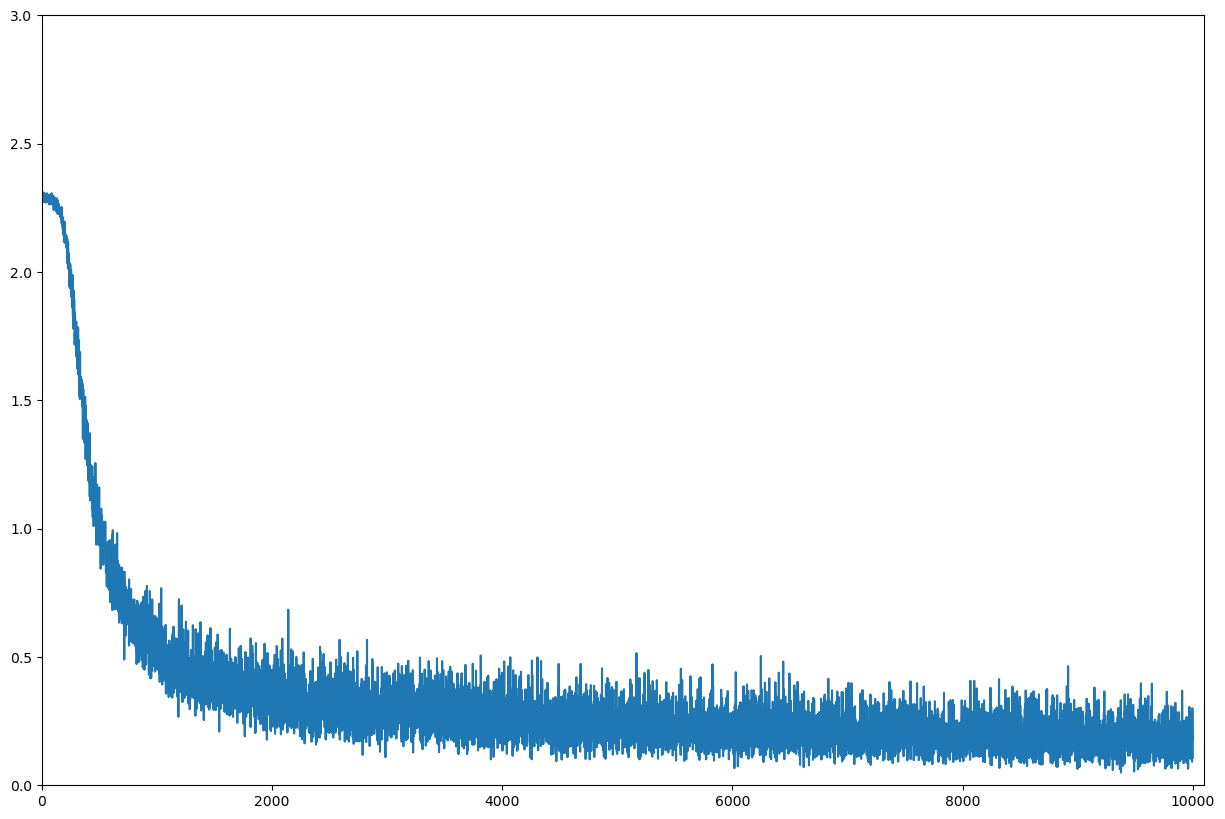

In [115]:
plt.figure(figsize = (15, 10))
plt.plot(train_loss_list)
plt.ylim(0, 3)
plt.xlim(0, 10100)
plt.show()

### 3. 시험데이터로 평가하기

* 학습 도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록

* 여기서는 1에폭별로 훈련데이터와 시험데이터에 대한 정확도를 기록

에폭(epoch)

* 하나의 단위
* 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다
    * 예를들어 훈련데이터 10,000개를 100개의 미니배치로 학습 할 경우, 확률적 경사하강법을 100회 반복하면 모든 훈련 데이터를 소진하게 된다
    * 이경우 100회가 1에폭이 된다

In [116]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True,
                                                  one_hot_label = True)


network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

# hyper parameter

iters_num = 10000
train_size = x_train.shape[0] # 60000
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# one epoch 당 확률적 경사하강법 반복 수
iter_per_epoch = max(train_size/batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f'train acc : {train_acc}, test_acc : {test_acc}')

train acc : 0.10441666666666667, test_acc : 0.1028
train acc : 0.7907666666666666, test_acc : 0.7954
train acc : 0.8769, test_acc : 0.8807
train acc : 0.9000166666666667, test_acc : 0.9027
train acc : 0.9096333333333333, test_acc : 0.9119
train acc : 0.9151833333333333, test_acc : 0.9167
train acc : 0.9202333333333333, test_acc : 0.921
train acc : 0.9242, test_acc : 0.9257
train acc : 0.9276666666666666, test_acc : 0.9289
train acc : 0.9314, test_acc : 0.9333
train acc : 0.9333166666666667, test_acc : 0.9347
train acc : 0.9365333333333333, test_acc : 0.9368
train acc : 0.9385333333333333, test_acc : 0.9388
train acc : 0.94095, test_acc : 0.9394
train acc : 0.9429833333333333, test_acc : 0.9424
train acc : 0.9446166666666667, test_acc : 0.9422
train acc : 0.94615, test_acc : 0.9444


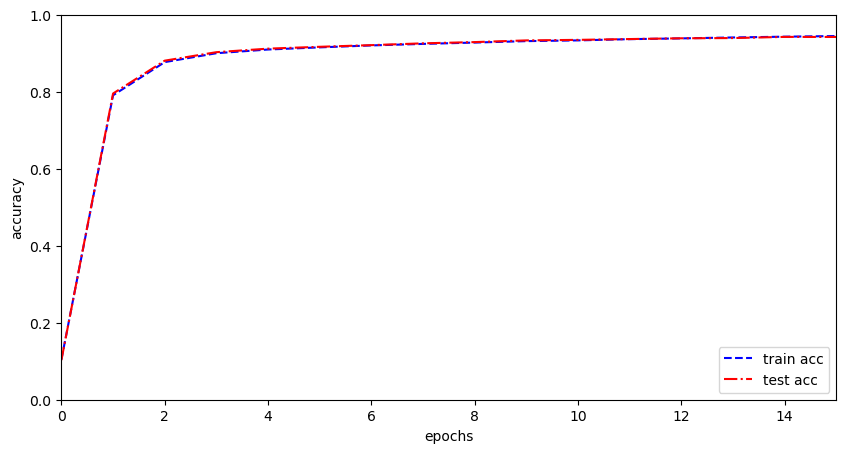

In [117]:
plt.figure(figsize = (10,5))
plt.plot(train_acc_list, 'b--', label = 'train acc')
plt.plot(test_acc_list, 'r-.', label = 'test acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.xlim(0, 15)
plt.ylim(0, 1)
plt.legend(loc = 'lower right')
plt.show()

In [118]:
train_acc

0.94615

## 6. 정리

* 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 매개변수를 갱신한다
* 수치 미분을 이용한 계산에는 시간이 걸리지만 그 구현은 간단하다. 하지만 시간이 오래걸린다.
* 오차역전파법은 기울기를 고속으로 구할 수 있다.

# 오차역전파법

## 1. 계산 그래프
* 계산 과정을 그래프로 나타낸 것
---

1. 무언가를 계산하는 복잡한 수식들도 시간의 흐름에 따른 국소적 계산으로 볼 수 있다
    * 슈퍼에서 사과를 2개를 샀는데 소비세 10%가 부과된다, 이때 지불금액은 어떻게 되는가?
    * 100 * 2 -> 200 * 1.1 -> 220
    * 이렇게 계산을 왼쪽에서 오른쪽으로 진행하는 단계를 순전파라고 한다.

2. 국소적 계산
    * 위 예시에서 100*2, 200*1.1 등 전체 계산중 작은 범위의 계산을 의미한다
    * 국소적 계산은 단순하지만 그 결과를 전달 함으로써 전체를 구성하는 복잡한 계산을 할 수 있음

3. 왜 계산그래프를 사용하는가 
    * 역전파를 통해 *미분*을 효율적으로 계산할 수 있는 장점이 있다
    



## 2. 연쇄법칙

* 생략

## 3. 역전파

* 생략

## 4. 단순한 계층 구현하기

### 4.1 곱셈 계층

* forward() : 순전파
* backward() : 역전파

In [119]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy        

In [120]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [121]:
mul_tax_layer.y

1.1

In [122]:
# 역전파 

dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


### 4.2 덧셈 계층

In [123]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [124]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tzx = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


## 5. 활성화 함수 계층 구현하기

### 5.1 ReLU계층

$\ y =
\begin{cases}
x,\;(x>0)\\
0,\;(x\leq0)
\end{cases}$

$\frac{\partial y}{\partial x} = 
\begin{cases}
1,\;(x>0)\\
0,\;(x\leq0)
\end{cases}$

In [125]:
class Relu:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [126]:
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


### 5.2 Sigmoid 계층

In [127]:
class Sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out
    
    def backward(self, dout):
        dx = dout * (1 - self.out) * self.out

        return dx

## 6. Affine/Softmax 계층 구현하기

### 6.1 Affine 계층

In [128]:
# 신경망 구현 방식

X = np.random.rand(2)
W = np.random.rand(2,3)
B = np.random.rand(3)

Y = np.dot(X, W) + B
Y

array([0.55501571, 0.65701008, 0.79431304])

### 6.2 배치용 Affine 계층

In [129]:
X_dot_W = np.array([[0,0,0],
                    [10,10,10]]) # 2 * 3 shape => batch size : 2, input shape : 3

B = np.array([1,2,3])

X_dot_W + B # broad casting

array([[ 1,  2,  3],
       [11, 12, 13]])

In [130]:
dY = np.array([[1,2,3],
               [4,5,6]])

dB = np.sum(dY, axis=0)
dB

#순전파일때는 편향 덧셈은 각각의 데이터(1번 데이터, 2번데이터, ...) 에 더해지기때문에 
# -> 역전파 때는 각 데이터의 역전파 값이 편향의 원소에 모여야 한다

array([5, 7, 9])

In [131]:
class Affine:
    
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        
        return dx

In [132]:
temp_x = np.array([[0,0,0],
                   [10,10,10]])

temp_x.reshape(temp_x.shape[0], -1)

array([[ 0,  0,  0],
       [10, 10, 10]])

### 6.3 Softmax-with-loss layer

In [133]:
class SoftmaxWithLoss:

    def __init__(self):
        self.loss = None # 손실
        self.y = None # softmax의 출력
        self.x = None # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx

In [140]:
x = np.array([[1,2,3],[4,5,6]])
t = np.array([[0,0,1],[0,1,0]])
softmaxloss = SoftmaxWithLoss()
softmaxloss.forward(x, t)
softmaxloss.backward(1)

array([[ 0.04501529,  0.12236424, -0.16737952],
       [ 0.04501529, -0.37763576,  0.33262048]])

In [144]:
softmaxloss.y

array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096]])

## 7. 오차역전파법 구현하기 

### 7.2 오차역전파법을 적용한 신경망 구현하기

In [ ]:
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_szie, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_szie)
        self.params['b2'] = np.zeros(output_szie)

        # 계층 생성
        #self.layers = OrderedDict()
        self.layers = {}
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

        def predict(self, x):
            for layer in self.layers.values():
                x = layer.forward(x)
            return x
        
        def loss(self, x, t): # x: 입력 데이터, t : 정답 레이블
            y = self.predict(x)

            return self.lastLayer.forward(y, t)
        
        def accuracy(self, x, t):
            y = self.predict(x)
            y = np.argmax(y, axis = 1)
            if t.ndim != 1 : t = np.argmax(t, axis = 1)
            accuracy = np.sum(y == t) / float(x.shape[0])

            return accuracy
        
        def numerical_gradient(self, x, t):
            loss_W = lambda W: self.loss(x,t)

            grads = {}
            grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
            grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
            grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
            grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

            return grads
        
        def gradient(self, x, t):
            # 순전파
            self.loss(x, t)

            #역전파
            dout = 1
            dout = self.lastLayer.backward(dout)

            layers = list(self.layers.values())
            layers.reverse()
            for layer in layers:
                dout = layer.backward(dout)

            #결과 저장
            grads = {}
            grads['W1'] = self.layers['Affine1'].dW
            grads['b1'] = self.layers['Affine1'].db
            grads['W2'] = self.layers['Affine2'].dW
            grads['b2'] = self.layers['Affine2'].db


In [ ]:
test_array = np.array([[1,2,3]])

input_size = 3
hidden_size = 2

w1 = weight_init_std * np.random.randn(input_size, hidden_size)
print(w1)
b1 = np.zeros(hidden_size)
print(b1)

test_affine = Affine(w1, b1)
test_array_affine = test_affine.forward(test_array)
print(test_array_affine)

test_relu = Relu()
test_array_relu = test_relu.forward(test_array_affine)
print(test_array_relu)

[[-0.00415143 -0.00636673]
 [-0.01121939 -0.00581881]
 [-0.00644081  0.00263031]]
[0. 0.]
[[-0.04591264 -0.01011342]]
[[0. 0.]]


In [ ]:
cross_entropy_error(np.array([[0.3,0.7], [0.2, 0.8]]), np.array([[0,1], [0,1]]))

0.2899091136979087

### 7.3 오차역전파법으로 구한 기울기 검증하기

In [ ]:
from dataset.mnist import load_mnist
from ch05.two_layer_net import TwoLayerNet
import numpy as np

# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch) # 수치 미분
grad_backprop = network.gradient(x_batch, t_batch) # 역전파법

for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ':' + str(diff))


W1:3.686295291898407e-10
b1:2.0295578070751784e-09
W2:5.433811355566256e-09
b2:1.3960856372896568e-07


### 7.4 오차역전파법을 사용한 학습 구현하기

In [ ]:
from dataset.mnist import load_mnist
from ch05.two_layer_net import TwoLayerNet
import numpy as np

# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 오차역전파법
    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        try_count = 1
        print(f'epoch : {try_count} \n train_acc:{train_acc}, test_acc{test_acc}\n')
        try_count += 1

epoch : 1 
 train_acc:0.09351666666666666, test_acc0.0925

epoch : 1 
 train_acc:0.9034833333333333, test_acc0.9069

epoch : 1 
 train_acc:0.9249166666666667, test_acc0.9261

epoch : 1 
 train_acc:0.9364666666666667, test_acc0.9358

epoch : 1 
 train_acc:0.94615, test_acc0.9447

epoch : 1 
 train_acc:0.9527166666666667, test_acc0.9491

epoch : 1 
 train_acc:0.9582, test_acc0.9564

epoch : 1 
 train_acc:0.9618666666666666, test_acc0.9577

epoch : 1 
 train_acc:0.9652666666666667, test_acc0.9605

epoch : 1 
 train_acc:0.96855, test_acc0.9619

epoch : 1 
 train_acc:0.9716833333333333, test_acc0.9663

epoch : 1 
 train_acc:0.9717833333333333, test_acc0.9659

epoch : 1 
 train_acc:0.9747, test_acc0.9682

epoch : 1 
 train_acc:0.97445, test_acc0.9661

epoch : 1 
 train_acc:0.9757666666666667, test_acc0.9682

epoch : 1 
 train_acc:0.97855, test_acc0.9694

epoch : 1 
 train_acc:0.9791333333333333, test_acc0.9702



In [ ]:
network.lastLayer.backward(1) 

array([[ 1.61617201e-12,  5.57448415e-12, -1.70353385e-09,
         1.44867291e-09,  1.14357208e-17,  4.57355429e-12,
         8.58288926e-14,  1.01079113e-10,  1.41930659e-10,
         1.12011528e-15],
       [ 2.19784337e-06,  3.67348767e-08,  1.58449307e-08,
         6.96011140e-08,  3.18466924e-07, -4.36852332e-06,
         6.20351621e-07,  7.29216073e-08,  9.87613136e-07,
         4.91457410e-08],
       [ 1.34060166e-08,  1.84714295e-10,  1.86493641e-09,
         8.97063007e-08,  2.77192194e-12, -1.12207683e-07,
         3.55828896e-10,  2.96327675e-10,  3.39801536e-09,
         2.99277073e-09],
       [ 9.17299266e-08, -3.10523566e-05,  2.05839283e-05,
         2.75380631e-07,  1.34443857e-07,  3.14386196e-07,
         9.52979641e-07,  1.67951662e-06,  7.01186027e-06,
         8.13111110e-09],
       [ 6.91059014e-08,  7.30663545e-08,  1.44789573e-05,
         1.16806220e-05,  1.64897616e-10,  2.45095088e-07,
         4.05758806e-11, -2.67296111e-05,  1.41560512e-08,
         1.

# 학습 관련 기술들

신경망 학습의 핵심 개념 설명
* 가중치 매개변수의 최적값을 탐색하는 최적화 방법
* 가중치 매개변수 초기값
* 하이퍼파라미터 설정 방법
* 오버피팅의 대응책인 가중치 감소와 드롭아웃
* 배치 정규화

## 1 매개변수 갱신

* 신경망의 목적 -> loss를 최소화 하는 매개변수를 찾는것
* 확률적 경사 하강법 
    * 미니 배치를 이용한 경사 하강법
    * 미니 배치는 데이터에서 미니배치로 **무작위로** 선정하기 때문에 확률적 경사하강법이 됨

### 1.1 모험가 이야기

* 지금 서 있는 장소에서 가장 크게 기울어진 방향으로 가는것이 SGD의 전략
* 이렇게 반복하면 언젠가 가장 깊은 곳에 찾아 갈 수 있음

### 1.2 확률적 경사 하강법

$ \displaystyle W \leftarrow W - \eta\frac{\partial{L}}{\partial{W}}$

* W : 갱신할 가중치 매개변수
* $\frac{\partial{L}}{\partial{W}}$은 W에 대한 손실 함수의 기울기
* $\eta$ 는 학습률을 의미

In [145]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 1.3 SGD의 단점

* SGD는 단순하고 구현도 쉽지만, 비효율적일 때가 있다
* 함수에 따라서 최적점으로 가는 방향이 길어 질 수 있다. (자세한건 책 참조)

### 1.4 모멘텀

* 모멘텀은 운동량을 뜻하는 단어  
$ v \leftarrow \alpha v - \eta\frac{\partial{L}}{\partial{W}} $  
$ W \leftarrow W + v $

* $v$는 물리에서 말하는 속도에 해당
* $\alpha v$ 항은 아무런 ㅎ미을 받지 않을때 서서히 하강시키는 역할을함 

In [ ]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zero_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

### 1.5 AdaGrad

* 학습률을 점차 줄여가는 방법이 존재
* 즉 처음에는 크게 학습하다 조금씩 작게 학습

$\displaystyle h \leftarrow h + \frac{\partial{L}}{\partial{W}} * \frac{\partial{L}}{\partial{W}}$  
  
$\displaystyle W \leftarrow W - \eta\frac{1}{\sqrt{h}}\frac{\partial{L}}{\partial{W}}$

In [146]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 1.6 Adam

* AdaGrad와 Momentume을 결합한 형태

In [ ]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


### 1.7 어느 갱신 방법을 이용할 것인가?

책 참조  
  
* 책에서 4개의 최적화 기법을 사용한 그래프가 있음
* 각각의 그래프마다 최적화하는 방법이다르고 그래프 형태도 다르게 나옴
* 모든 문제에서 항상 띄어날 수는 없기 때문에 여러 optimizer을 써보는게 중요

### 1.8 Mnist 데이터셋으로 본 갱신 방법 비교

책 참조  
  
* sgd가 가장 느리게 학습 됐음(mnist에 경우)
* 다른 문제에 경우 sgd가 빠르게 학습될 때도 있고 최종 정확도가 높았을 때도 있음

## 2 가중치의 초깃값

* 신경망 학습에서 특히 중요한 것이 가중치의 초깃값.
* 가중치의 초깃값을 무엇으로 설정하느냐가 신경망 학습의 성패를 가를 수 있다.

### 2.1 초깃값을 0으로 하면

* 초기값을 0으로 하게 된다면 올바른 학습이 이뤄지지 않는다.
* 입력층에 가중치가 0이기 때문에 두 번째 층의 뉴런에 모두 같은 값이 전달 된다. 가중치의 갱신이 되지않음
* 이는 가중치를 여러 개 갖는 의미를 사라지게 하기 때문에 초깃값을 무작위로 설정해야함.

### 2.2 은닉층의 활성화값 분포

* 은닉층의 활성화값의 분포를 관찰하면 중요한 정보를 얻을 수 있다.
* 활성화 함수로 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입력데이터를 흘리며 각 층의 활성화값 분포를 히스토그램으로 그려보기  

* 시그모이드 -> 입력값($-inf ~ +inf$)이 작아질수록 0에 가깝고 커질수록 1에 가까워진다
* 이 예시에서는 bin 이 30이기 때문에 (-1, -0.97) : -1, (0.97, 1) : 1
    * 이때 약 -3.47이하 3.47 이상이면 -1 또는 1이 됨

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.rand(1000, 100) # 1000개의 데이터, uniform dist(0,1)
node_num = 100 # 각 은닉층의 노드(뉴런) 수 
hidden_layer_size = 5 # 은닉층의 갯수
activations = {} # 활성화 값 저장 dict

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

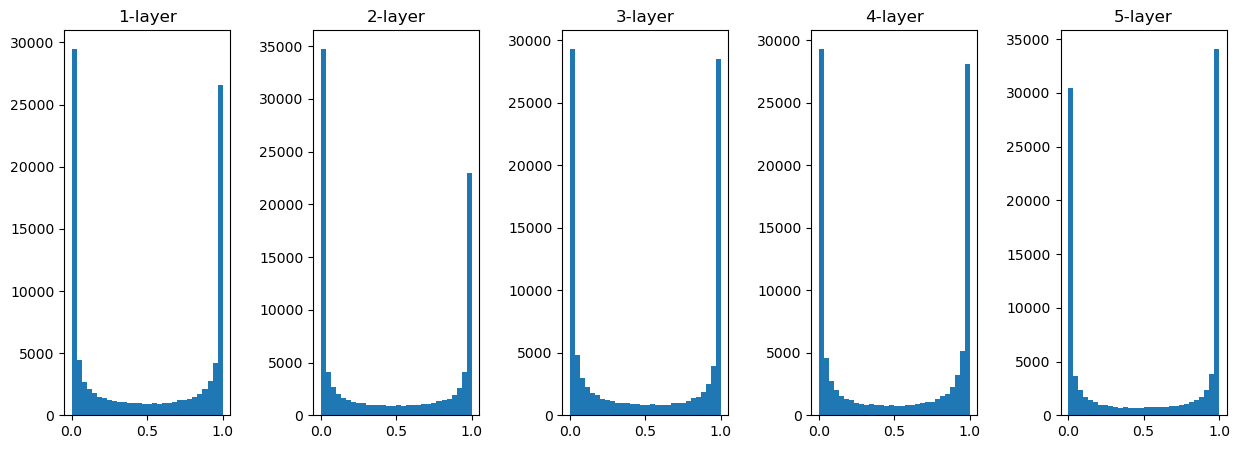

In [ ]:
# draw histogram

plt.figure(figsize=(15, 5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))

plt.subplots_adjust(wspace=0.5)
plt.show()

각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있다  
시그모이드 미분함수는 $f(x)(1-f(x)$ 인데 이렇게 되면 0과 1에 가까운 값은 모두 미분값이 0에 가까워지기 때문에 기울기 소실이 일어날 수 있음

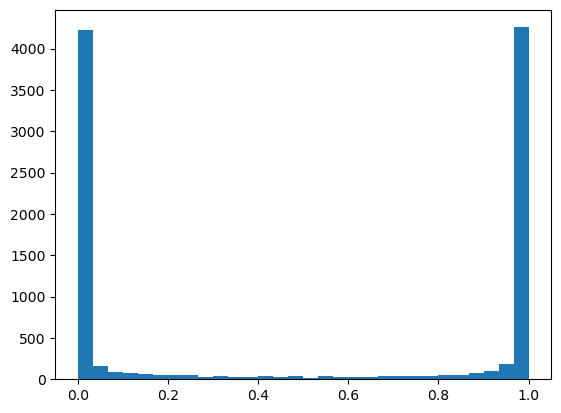

In [ ]:
# 참고 uniform분포와 normal분포의 곱의 합은 어떤 형태를 나타내는가


res = []

for _ in range(10000):
    x = np.random.rand(1000)
    y = np.random.randn(1000)
    z = x*y

    res.append(sigmoid(sum(z)))

plt.hist(res, bins=30)
plt.show()

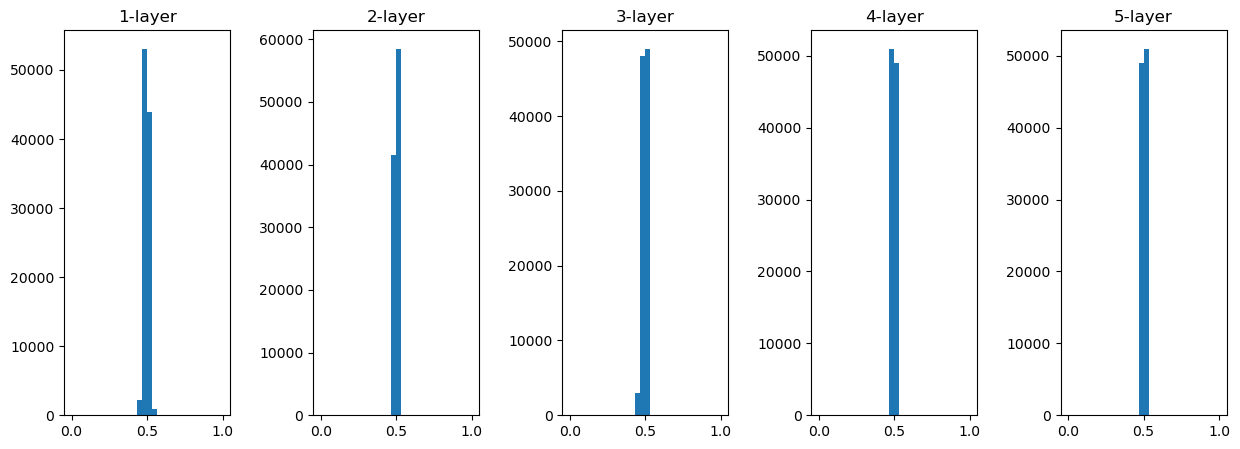

In [ ]:
# 가중치의 표준편차를 0.01로 바꾸어 같은 실험 반복

x = np.random.rand(1000, 100) # 1000개의 데이터, uniform dist(0,1)
node_num = 100 # 각 은닉층의 노드(뉴런) 수 
hidden_layer_size = 5 # 은닉층의 갯수
activations = {} # 활성화 값 저장 dict

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01 # 0.01을 곱하게 되면 정규분포의 특성으로 인해 표준편차가 0.01인 정규분포가 됨
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

plt.figure(figsize=(15, 5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))

plt.subplots_adjust(wspace=0.5)
plt.show()

이 경우에는 기울기 소실문제는 없을 수 있으나  
활성화값들이 치우쳐져 있어 문제가 발생  
즉 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러 개 둔 의미가 없어진다는 뜻.

딥러닝에서 각 층의 활성화값들은 적당히 고루 분포되어야함  
층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망 학습이 효율적으로 이뤄지기 때문  

Xavier 초기값

* 각 층의 활성화값들을 광범위하게 분포시킬 목적으로 만듬
* 가중치의 초깃값의 표준편차가 $\frac{1}{\sqrt(n)}$이 되도록 설정함
* 앞 층에 노드가 많을 수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다

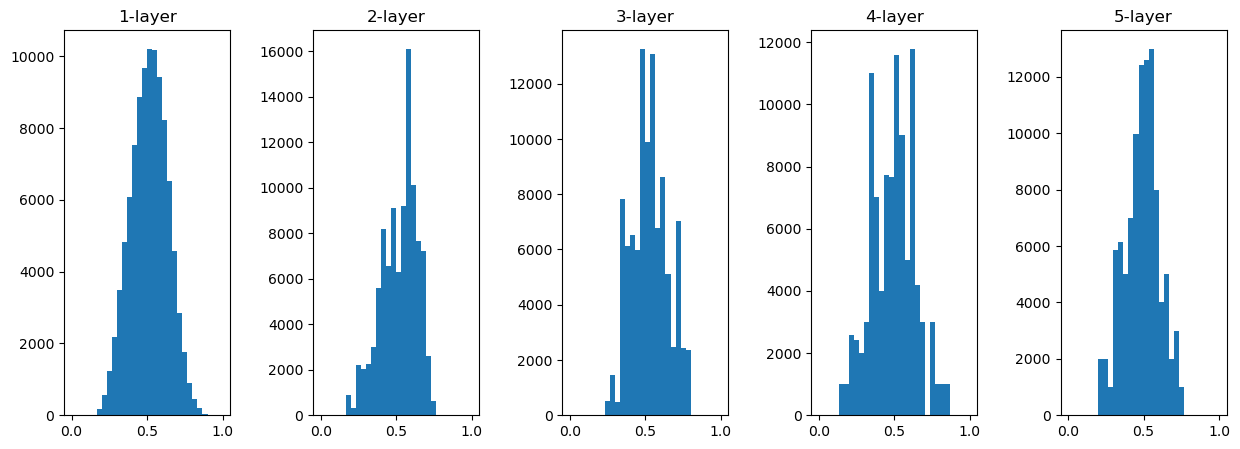

In [ ]:
# 가중치의 표준편차를 xavier초깃값으로 변경

x = np.random.rand(1000, 100) # 1000개의 데이터, uniform dist(0,1)
node_num = 100 # 각 은닉층의 노드(뉴런) 수 
hidden_layer_size = 5 # 은닉층의 갯수
activations = {} # 활성화 값 저장 dict

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

plt.figure(figsize=(15, 5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))

plt.subplots_adjust(wspace=0.5)
plt.show()

각 층에 흐르는 데이터는 적당히 펴져 있으므로, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것으로 기대됨

### 2.3 ReLU를 사용할 때의 가중치 초깃값

* Xavier 초기값은 활성화 함수가 선형인 것을 전제로 이끈 결과
    * 사실 선형은 아니지만 좌우 대칭으로 중앙부근은 선형이라 할 수 있음
  
* ReLU는 Xavier초기값 말고 다른 특성화된 초깃값을 이용

ReLU 초깃값 함수 HE 초깃값

* 앞 계층의 노드가 n개일 때 표준편차가 $\sqrt\frac{2}{n}$인 정규분포를 사용함

활성화 함수로 ReLU를 사용한 경우의 가중치 초깃값에 따른 활성화 분포 값 변화

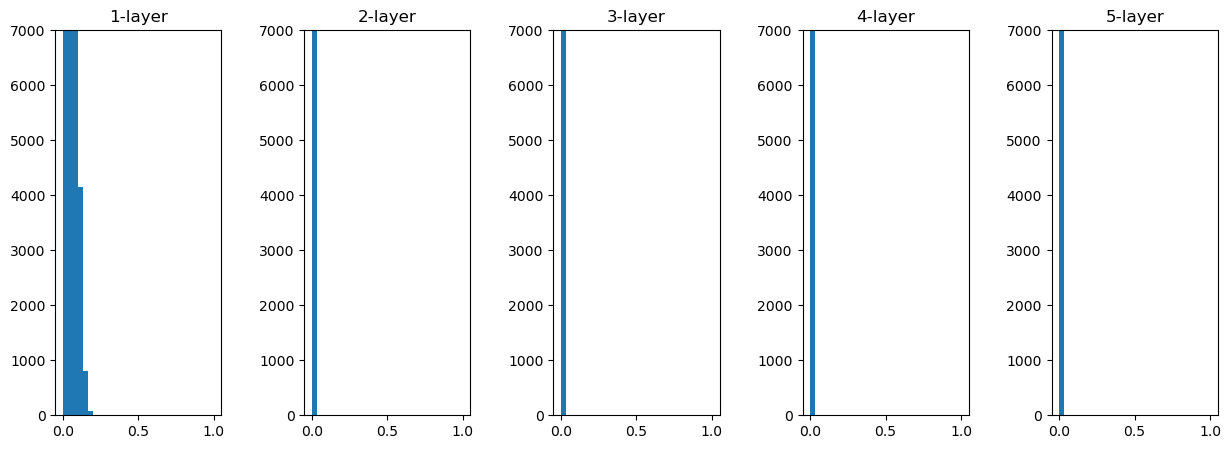

In [ ]:
# 표준편차가 0.01인 정규분포를 초깃값으로 사용

def ReLU(x):
    return np.maximum(0, x)

x = np.random.rand(1000, 100) 
node_num = 100 
hidden_layer_size = 5 
activations = {} 

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

plt.figure(figsize=(15, 5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.ylim(0, 7000)


plt.subplots_adjust(wspace=0.5)
plt.show()

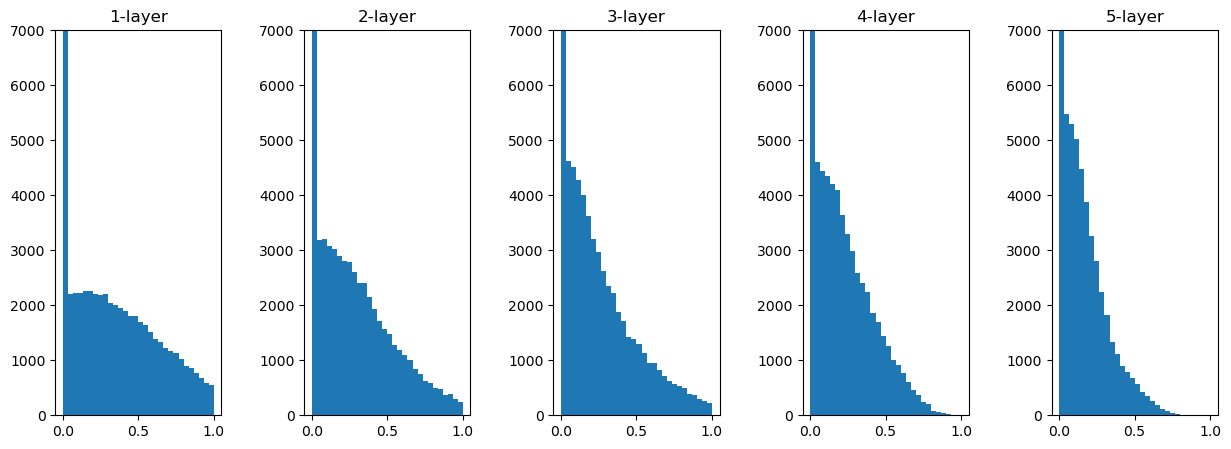

In [ ]:
# Xavier 초깃값

def ReLU(x):
    return np.maximum(0, x)

x = np.random.rand(1000, 100) 
node_num = 100 
hidden_layer_size = 5 
activations = {} 

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

plt.figure(figsize=(15, 5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.ylim(0,7000)

plt.subplots_adjust(wspace=0.5)
plt.show()

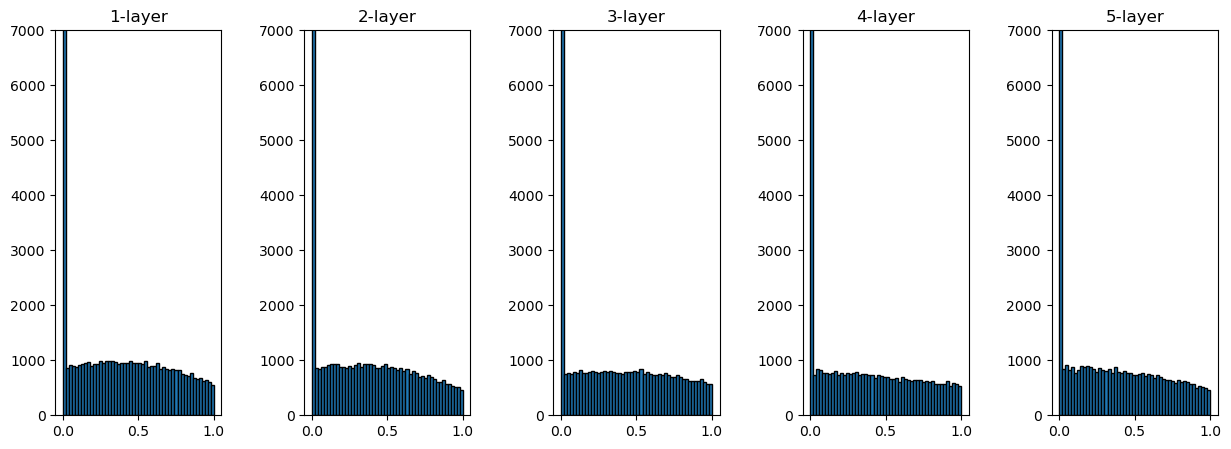

In [ ]:
# HE 초깃값

def ReLU(x):
    return np.maximum(0, x)

x = np.random.rand(1000, 100) 
node_num = 100 
hidden_layer_size = 5 
activations = {} 

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(2/node_num)
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

plt.figure(figsize=(15, 5))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 50, range=(0,1), edgecolor = 'black')
    plt.ylim(0,7000)

plt.subplots_adjust(wspace=0.5)
plt.show()

HE 초깃값은 모든 층에서 균일하게 분포되어 있다.  
층이 깊어져도 분포가 균일하게 유지 되기 때문에 적절한 값이 나올것으로 기대
  
결론
* ReLU사용시 HE초깃값 이용
* sigmoid, tanh등의 S자 모약 곡선일 때는 Xavier초깃값을 쓰겠습니다  

### 2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

* 실제 데이터를 이용해 가중치의 초깃값 설정에 따른 손실함수의 비교
  
* 기본 활성화 함수는 ReLU
    * ReLU일때 여러 가중치 초깃값을 설정해보고 loss를 비교


===========iteration:0===========
std=0.01:2.302537193093551
Xavier:2.2906879346676483
He:2.376930747424488
===========iteration:100===========
std=0.01:2.3018616193085215
Xavier:2.2510874858570773
He:1.486716120379977
===========iteration:200===========
std=0.01:2.3022900412623213
Xavier:2.1022600009059245
He:0.7629276117617019
===========iteration:300===========
std=0.01:2.303624773637724
Xavier:1.6965814168925428
He:0.49980523385738207
===========iteration:400===========
std=0.01:2.3026764002265505
Xavier:1.1552354875687392
He:0.3928693228270796
===========iteration:500===========
std=0.01:2.30046689387599
Xavier:0.8641932485890287
He:0.35631022068349594
===========iteration:600===========
std=0.01:2.302872916099037
Xavier:0.6476159648130226
He:0.34726747257669655
===========iteration:700===========
std=0.01:2.299102080528951
Xavier:0.5824752104083162
He:0.2793336544248005
===========iteration:800===========
std=0.01:2.303991544503426
Xavier:0.5315036780046365
He:0.3338286268938374


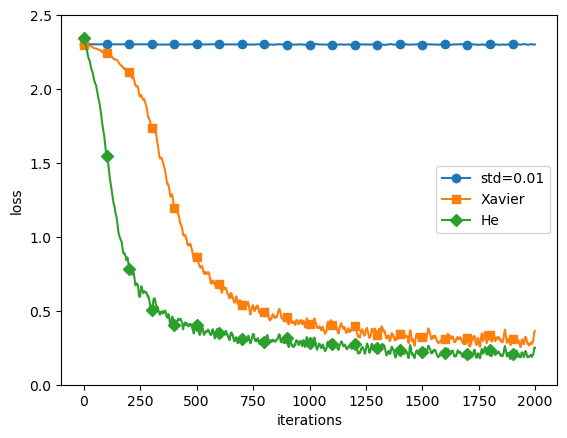

In [ ]:
# coding: utf-8
import os
import sys

sys.path.append('./deep-learning-from-scratch')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

## 3 배치 정규화

* 가중치 초깃값을 설정해주어 각 층의 활성화값 분포가 적당히 퍼지면서 학습이 원활하게 수행됨
* 각 층의 활성화를 적당히 퍼뜨리도록 강제하는게 **배치정규화**

### 3.1 배치정규화 알고리즘

* 배치 정규화의 장점  
    * 학습을 빠리 진행할 수 있다
    * 초깃값에 크게 의존하지 않는다
    * 오버피팅을 억제한다

배치 정규화는 이름 그대로 학습 시 미니배치를 단위로 정규화 한다.

=> 데이터 분포가 평균이 0, 분산이 1이 되도록

$\displaystyle \mu_\beta \leftarrow \sum_{i=1}^{m}x_i$  
$\displaystyle \sigma_\beta^2 \leftarrow \frac{1}{m}\sum_{i=1}^{m}(x_i-\mu_\beta)^2$  
$\displaystyle \hat{x_i} \leftarrow \frac{x_i - \mu_\beta}{\sqrt{\sigma_\beta^2 + \epsilon}}$

### 3.2 배치 정규화의 효과

* 가중치 초깃값에 의존하지 않고 학습이 잘되는거를 확인할 수 있음(책 참조)

## 4 바른 학습을 위해

* 기계학습에서는 오버피팅이 문제가 되는 일이 많습니다.(신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태)
* 기계학습은 범용 성능을 지향, 훈련데이터에서 못본 데이터가 주어져도 바르게 식별해내는 모델이 바람직함
* 복잡하고 표현력 높은 모델도 좋지만 오버피팅을 억제하는 기능 또한 매우 중요함

### 4.1 오버피팅

* 오버피팅은 주로 다음의 두 경우에 일어남
    * 매개변수가 많고 표현력이 높은 모델
    * 훈련 데이터가 적음

* 일부러 오버피팅을 만든뒤 결과를 확인
    * 60000개의 MNIST데이터 셋중 300개만 사용, 7층 네트워크 사용

epoch:0, train acc:0.09, test acc:0.0861
epoch:1, train acc:0.11333333333333333, test acc:0.0948
epoch:2, train acc:0.15, test acc:0.104
epoch:3, train acc:0.17666666666666667, test acc:0.1198
epoch:4, train acc:0.2, test acc:0.1331
epoch:5, train acc:0.24, test acc:0.1539
epoch:6, train acc:0.2633333333333333, test acc:0.1749
epoch:7, train acc:0.32, test acc:0.1973
epoch:8, train acc:0.35, test acc:0.2179
epoch:9, train acc:0.37333333333333335, test acc:0.2384
epoch:10, train acc:0.37333333333333335, test acc:0.2547
epoch:11, train acc:0.3933333333333333, test acc:0.2632
epoch:12, train acc:0.4166666666666667, test acc:0.2724
epoch:13, train acc:0.43333333333333335, test acc:0.2927
epoch:14, train acc:0.44666666666666666, test acc:0.3023
epoch:15, train acc:0.47, test acc:0.3228
epoch:16, train acc:0.48, test acc:0.3282
epoch:17, train acc:0.5466666666666666, test acc:0.3528
epoch:18, train acc:0.5333333333333333, test acc:0.3561
epoch:19, train acc:0.5533333333333333, test acc:0.371

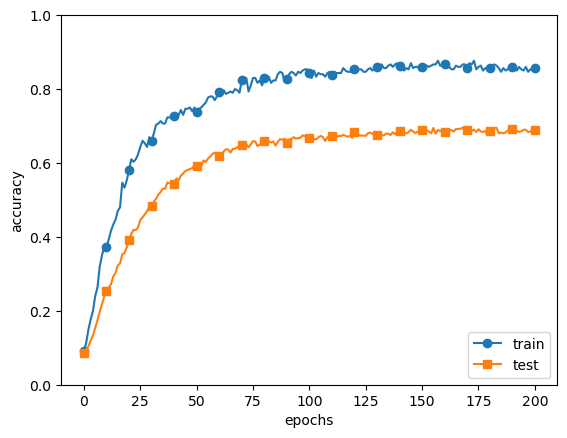

In [2]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

#weight_decay_lambda = 0 # weight decay 사용하지 않는 경우
weight_decay_lambda = 0.1 # 가중치를 작게 만들어 오버피팅을 방지해주는 역할 

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 4.2 가중치 감소

* 오버피팅 억제용으로 예로부터 많이 이용해온 방법 중 가중치 감소(weight decay)라는 것이 있다
* L1 규제, L2규제 가 존재
* L1 규제는 로스에 $\sum \lambda|w_i|$, L2 규제는 로스에 $\sum w_i^2$을 더해준다

### 4.3 드롭아웃

* 모델이 복잡해지면 가중치 감소만으로는 대응하기 어렵다
* 이럴때 드롭아웃 기법을 사용
    * 훈련 때 은닉층의 뉴런을 무작위로 갈라 삭제
    * 시험 때는 모든 뉴런에 신호를 전달함(각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력?)

* 학습 때 뉴런을 무작위로 삭제하는 행위를 매번 다른 모델을 학습시키는 것으로 해석이 가능하다
    * 기계학습의 앙상블 학습과 유사하지만 앙상블은 여러 모델을 학습시키는것에 비해 드롭아웃은 하나의 신경망 학습으로 비슷하게 구현이 가능함

In [ ]:
# 드롭 아웃 구현

class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio 
            #np.random.rand(*x.shape) => np.random.rand(x.shape[0], x.shape[1], ...) x의 형태가 어떻게 나올지 모를때 사용하면 좋을듯
            return x * self.mask

    def backward(self, dout):
        return dout * self.mask

In [4]:
np.random.rand(3,3)

array([[0.37992304, 0.17006819, 0.11606799],
       [0.46289112, 0.35767329, 0.96159941],
       [0.00518087, 0.91972654, 0.67681183]])

## 5 적절한 하이퍼파라미터 값 찾기

* 신경망의 하이퍼 파라미터
    * 뉴런 수, 배치 크기, 매개변수 갱신시의 학습률, 가중치 감소

* 하이퍼파라미터의 값을 최대한 효율적으로 탐색하는 방법을 알아야한다


### 5.1 검증 데이터

* 훈련데이터셋으로 학습을하고 시험데이터를 이용해 범용 성능을 평가
* validation set을 이용해 최적의 하이퍼파라미터 값을 찾는게 목표

In [8]:
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

# suffle train data
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
val_rate = 0.2
val_num = int(x_train.shape[0]*val_rate)

x_val = x_train[:val_num]
t_val = t_train[:val_num]
x_train = x_train[val_num:]
t_train = t_train[val_num:]

### 5.2 하이퍼파라미터 최적화

* 하이퍼파라미터를 최적화할 때의 핵심은 하이퍼파라미터의 '최적 값'이 존재하는 범위를 조금씩 줄여간다는 것
* 신경망의 하이퍼파라미터 최적화는 grid search보다는 무작위 샘플링 탐색이 더 좋은 결과를 낸다고 알려져 있다

최적화 프로세스  

1. 하이퍼파라미터 값의 범위를 설정
2. 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출한다
3. 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가
4. 1단계와 2단계를 특정 횟수(100회) 반복하여, 결과를 보고 하이퍼퍼라미터의 범위를 좁힌다

### 5.3 하이퍼파라미터 최적화 구현하기

* 학습률과 가중치 감소의 세기를 조절하는 계수를 탐색하는 문제 풀기

In [16]:
weight_decay = 10 ** np.random.uniform(-8,-4) # -8~-4 사이의 임의의 값
lr = 10 ** np.random.uniform(-6, -2)

val acc:0.15 | lr:4.608161620510909e-05, weight decay:6.729149770740637e-06
val acc:0.32 | lr:0.0018112712389775478, weight decay:8.992066966681145e-06
val acc:0.17 | lr:0.000488234069537585, weight decay:1.6133248555580633e-07
val acc:0.09 | lr:0.00010899365293285311, weight decay:3.7449864159691315e-05
val acc:0.07 | lr:1.704158920757452e-06, weight decay:5.3988903460590254e-05
val acc:0.14 | lr:0.0006574928067320544, weight decay:1.4782558862049614e-08
val acc:0.08 | lr:1.3125198265696132e-06, weight decay:6.287124638355713e-08
val acc:0.1 | lr:1.7282013587321885e-05, weight decay:6.8042025620692e-08
val acc:0.12 | lr:7.922408497338675e-05, weight decay:1.5411899283569438e-07
val acc:0.08 | lr:5.0352126784156404e-05, weight decay:1.8537535808520838e-05
val acc:0.72 | lr:0.0068001171661017075, weight decay:3.3939098801708013e-06
val acc:0.12 | lr:6.193414182172306e-05, weight decay:5.6161123549839635e-06
val acc:0.04 | lr:1.1731296536275181e-06, weight decay:9.059592982252832e-05
val

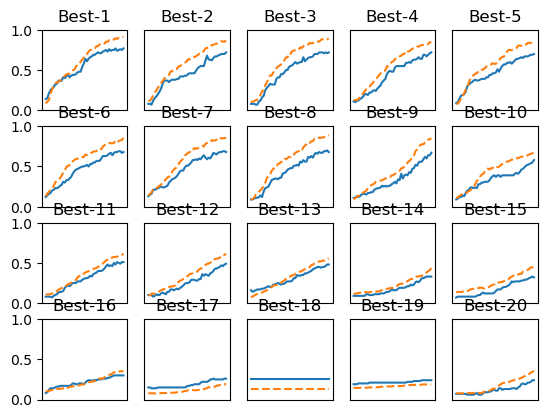

In [23]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()


# 합성곱 신경망(CNN)

* 합성곱은 이미지 인식과 음성 인식 등 다양한 곳에서 사용되는데 특히 이미지 인식 분야에서 딥러닝을 활용한 기법은 거의 CNN을 활용하고 있음

## 1. 전체 구조

* CNN고 기본적인 신경망 구조와 같이 계층을 조합해서 만들 수 있다.
* 다만 지금까지의 신경망과의 차이점은 합송곱 계층과, 풀링 계층이 등장
* 지금까지 본 신경망은 인접하는 계층의 모든 뉴런과 결합되어 있었다.(완전연결, 완전연결계층을 Affine계층 이라 함)


층이 5개인 완전연결 신경망(분류)

Affine-ReLU --> Affine-ReLU --> Affine-ReLU --> Affine-ReLU --> Affine-Softmax

CNN 구조

Conv-ReLU-Polling --> Conv-ReLU-Polling --> Conv-ReLU --> Affine-ReLU --> Affine-Softmax

## 2. 합성곱 계층

* CNN에서는 패딩, 스트라이드 등 CNN 고유의 용어가 등장
* 각 계층사이에 3차원 데이터같이 입체적인 데이터가 흐름

### 2.1 완전연결 계층의 문제점

1. 데이터의 형상이 무시된다
    * 입력데이터가 이미지인경우 세로,가로,채널(색상)로 구성된 3차원 데이터이지만 완전연결계층에 입력할때는 1차원 데이터로 평탄화를함
    * 이미지는 3차원 형상이며 이를 무시하면 안됨

-> 합성곱 계층은 형상을 유지한다. 3차원으로 입력을 받으면서 다음 계층에도 3차원으로 데이터를 전달함

### 2.2 합성곱 연산

필터연산 
입력데이터가 (4,4)일때 필터(커널)이 (3,3)이면 출력은 (2,2)가 된다.

필터의 형상과 값이 완전연결 신경망의 가중치 매개변수와 편항에 해당된다  
참고 : 편향은 필터를 적용한 원소의 임의의 값을 더한다(모든 원소에)

### 2.3 패딩

* 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(0)으로 채우기도 한다
* (4,4)입력데이터에 폭이 1인 패딩을 적용하면 (5,5)입력이 됨

패딩은 주로 출력 크기를 조정할 목적으로 사용한다.  
-> 예를들어 (4,4) 입력데이터에 (3,3) 필터를 적용하면 (2,2)가 되어 입력보다 2만큼 줄어듬
-> 이는 합성곱 연산을 여러번 반복하는 심층 신경망에서는 문제가 될 수 있다.

### 2.4 스트라이드

* 필터를 적용하는 위치의 간격을 스트라이드 라고 한다

최종 출력 계산 방법

입력 크기 : (H, W)  
필터 크기 : (FH, FW)  
출력 크기 : (OH, OW)  
패딩 : (P)  
스트라이드 : (S)  

$\displaystyle OH = \frac{H + 2P - FH}{S} + 1$  
    
$\displaystyle OW = \frac{W + 2P - FW}{S} + 1$

단 OH, OW는 정수값이여야함  



### 2.5 3차원 데이터의 합성곱 연산

* (5,5,3) 의 입력데이터가 있을때 필터는 (3,3,3) 이런식으로 하나의 채털의 하나의 필터의 연산으로 생각하면됨
* 결과로 (3,3,3)의 3채널의 값이 나오면 각 원소간 합을구해 (3,3)으로 하나의 채널로 축소시킴
* 당연히 입력채널수와 필터채널수는 동일해야함

### 2.6 블록으로 생각하기

* 책에서 블록으로 생각하라하지만 나는 더 햇갈리는거같음
* 3채널 이미지에 하나의 필터를 사용하지 않고 여러 필터를 사용할 수 있음
* 입력 데이터(C, H, W) 필터(FN, C, FH, FW) 출력데이터 (FN, OH, OW)

### 2.7 배치처리

* 신경망 처리에서는 입력 데이터를 한 덩어리로 묶어 배치로 처리했다 
* 합성곱 연산도 마찬가지로 배치 처리를 할 수 있음

## 3. 풀링 계층

* 풀링는 세로 가로 방향의 공간을 줄이는 연산
* (4,4)입력데이터를 이용할때 스트라이드가 2인 (2,2) 맥스풀링을 실행하면 (2,2)출력데이터가 생성
* 보통 풀링의 윈도우 크기와 스트라이드는 같은값으로 설정한다
* 맥스풀링 이외에도 평균 풀링 등이 있다

### 3.1 풀링 계층의 특징

* 학습해야 할 매개변수가 없다.
* 채널 수가 변하지 않는다
* 입력의 변화에 영향을 적게 받는다

## 4. 합성곱/풀링 계층 구현하기

### 4.1 4차원 배열

In [24]:
x = np.random.rand(10, 1, 28, 28) # 이미지로 생각하면, (이미지 갯수, 채널 수 , 높이, 너비)
x.shape

(10, 1, 28, 28)

In [25]:
x[0].shape
x[1].shape

(1, 28, 28)

In [29]:
x[0,0] # 첫번째 이미지의 첫번째 채널

array([[8.99431065e-01, 9.10893376e-01, 3.53559981e-01, 9.70035382e-01,
        8.30041590e-01, 2.80970657e-01, 3.21877103e-01, 1.63342234e-01,
        3.80031697e-01, 5.97846621e-01, 3.72946956e-01, 3.09647684e-01,
        6.31966733e-01, 8.31815180e-01, 1.70400767e-01, 7.38355432e-01,
        2.05361425e-01, 6.94580786e-01, 9.18775309e-01, 9.85328832e-02,
        9.20661186e-01, 3.10525048e-01, 3.01582228e-01, 1.60377706e-01,
        7.10844290e-01, 9.43318662e-01, 7.01320865e-01, 8.48416376e-01],
       [1.47557640e-01, 6.26600281e-01, 9.80596576e-01, 8.73133547e-01,
        7.39367031e-01, 2.25061242e-01, 6.71637400e-01, 8.85373183e-01,
        1.36074178e-01, 1.47058218e-01, 1.17182532e-01, 3.71224332e-01,
        6.44977213e-01, 8.67660216e-01, 9.02285688e-01, 1.80134484e-01,
        8.44785833e-01, 1.41161086e-02, 3.51452426e-03, 4.12004033e-01,
        8.55667121e-01, 5.60641513e-01, 9.27382193e-01, 4.85191205e-01,
        9.69712087e-01, 9.39528644e-01, 4.55786938e-01, 6.80917

### 4.2 im2col로 데이터 전개하기

* 입력데이터를 필터링하기 좋게 전개하는 함수
* 3차원 입력데이터에 im2col을 적용하면 2차원 행렬로 변환됨

### 4.3 합성곱 계층 구현하기



In [33]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):

    N, C, H, W = input_data.shape # 4차원 
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant') #패딩추가, 
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [46]:
x1 = np.random.rand(1,3,7,7)
col1 = im2col(x1, 5, 5, stride=2, pad=0)
print(col1.shape)
print(col1)


(4, 75)
[[0.03333358 0.9340735  0.90715822 0.46387399 0.21161806 0.191387
  0.04564288 0.83628159 0.89228729 0.44144642 0.93492739 0.28146806
  0.15493876 0.36613951 0.31087136 0.88888731 0.93688998 0.4143633
  0.56654494 0.51203221 0.12295592 0.29975836 0.06856324 0.93497969
  0.4168509  0.13328917 0.82976439 0.22253175 0.89866924 0.10122791
  0.61030606 0.3392148  0.9460859  0.04643288 0.22913973 0.62537065
  0.6630547  0.50854973 0.92516206 0.89470877 0.80657973 0.77681746
  0.86805509 0.05103419 0.40206148 0.29208264 0.80119044 0.24323208
  0.7778706  0.13668269 0.97034806 0.74716043 0.16472601 0.93144255
  0.97942427 0.3716285  0.53873657 0.93475275 0.47324933 0.82933529
  0.84313808 0.30821622 0.18169663 0.35460425 0.26862391 0.18360283
  0.12034319 0.5989444  0.26823946 0.213326   0.34382965 0.19845222
  0.22118015 0.44857151 0.23918757]
 [0.90715822 0.46387399 0.21161806 0.38638015 0.66662489 0.83628159
  0.89228729 0.44144642 0.77965269 0.72334622 0.15493876 0.36613951
  0.310

In [ ]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (2*self.pad - FH)/self.stride)
        out_w = int(1 + (W + 2*self.pad - FW)/self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T
        out = np.dot(col, col_W) + self.b

        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        return out

In [41]:
import numpy as np

# 가상의 데이터 생성
N = 2  # 배치 크기
C = 3  # 채널 수
H = 4  # 높이
W = 5  # 너비

# 원본 데이터 생성 (4D 형태: (N, C, H, W))
original_data = np.random.random((N, C, H, W))

# 첫 번째 변환: out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
reshaped_transposed_data = original_data.reshape(N, H, W, -1).transpose(0, 3, 1, 2)

# 두 번째 변환: out.reshape(N, -1, out_h, out_w)
flattened_data = original_data.reshape(N, -1, H, W)

# 결과 출력
print("Original Shape:", original_data.shape)
print("Reshaped and Transposed Shape:", reshaped_transposed_data.shape)
print("Flattened Shape:", flattened_data.shape)

Original Shape: (2, 3, 4, 5)
Reshaped and Transposed Shape: (2, 3, 4, 5)
Flattened Shape: (2, 3, 4, 5)


### 4.4 풀링계층 구현하기

In [ ]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride =1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H-self.pool_h) / self.stride)
        out_w = int(1 + (W-self.pool_w) / self.stride)

        # 전개 (1)
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.poll_w)

        # 최댓값 (2)
        out = np.max(col, axis=1)

        # 성형 (3)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        return out

## 5. CNN 구현하기

* simple convolution network  

convolution-ReLU-Pooling --> Affine-ReLU --> Affine-softmax

In [ ]:
class SimpleConvNet:
    def __init__(self, input_dim=(1,28,28), conv_param={'filter_num' : 30, 'filter_size':5, 'pad':0, 'strid':1}, 
                 hidden_size = 100, output_size = 10, weight_init_std = 0.01):
        
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_strid = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))
    
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_ouput_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(ouput_size)
        
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                           self.params['b1'],
                                           self.params['stride'],
                                           self.params['pad'])